In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sys

# Insert your own path
path = "/Users/arshianayebnazar/Documents/GitHub/DroughtPrediction/src/"

sys.path.insert(0, path)

from Models.lstm import getModel

In [2]:
df = pd.read_csv(path + 'data/cleandrought2010-2022.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,None,D0,D1,D2,D3,D4
0,0.0,0.22,2.31,37.66,47.07,12.74
1,0.0,0.22,2.31,37.66,47.07,12.74
2,0.0,0.20,2.31,37.67,47.07,12.74
3,0.0,0.20,2.31,37.67,48.22,11.59
4,0.0,0.21,2.31,37.67,48.22,11.59


In [6]:
training = df.iloc[0:len(df)-104, :].values
test = df.iloc[len(df)-104:, :].values

In [7]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# training_scaled = sc.fit_transform(training)

In [11]:
X_train = []
y_train = []

for i in range(52, len(training)):
    X_train.append(training[i-52:i, :])
    y_train.append(training[i, :])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

In [50]:
model = getModel(X_train)

history = model.fit(X_train, y_train, epochs=400, batch_size = 32)

87.0760
Epoch 163/400
15/15 [==============================] - 1s 60ms/step - loss: 83.2793
Epoch 164/400
15/15 [==============================] - 1s 61ms/step - loss: 80.5087
Epoch 165/400
15/15 [==============================] - 1s 63ms/step - loss: 81.5706
Epoch 166/400
15/15 [==============================] - 1s 60ms/step - loss: 80.9406
Epoch 167/400
15/15 [==============================] - 1s 61ms/step - loss: 82.2676
Epoch 168/400
15/15 [==============================] - 1s 66ms/step - loss: 80.8259
Epoch 169/400
15/15 [==============================] - 1s 60ms/step - loss: 78.5262
Epoch 170/400
15/15 [==============================] - 1s 60ms/step - loss: 82.0626
Epoch 171/400
15/15 [==============================] - 1s 61ms/step - loss: 77.9004
Epoch 172/400
15/15 [==============================] - 1s 59ms/step - loss: 78.2008
Epoch 173/400
15/15 [==============================] - 1s 61ms/step - loss: 75.6945
Epoch 174/400
15/15 [==============================] - 1s 59ms/step 

In [51]:
X_test = []
y_test = []

for i in range(52, len(test)):
    X_test.append(test[i-52:i, :])
    y_test.append(test[i, :])

In [52]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

In [53]:
yhat = model(X_test).numpy()

In [54]:
noneHat = yhat[:, 0]
noneReal = y_test[:, 0]

d0Hat = yhat[:, 1]
d0Real = y_test[:, 1]

d1Hat = yhat[:, 2]
d1Real = y_test[:, 2]

d2Hat = yhat[:, 3]
d2Real = y_test[:, 3]

d3Hat = yhat[:, 4]
d3Real = y_test[:, 4]

d4Hat = yhat[:, 5]
d4Real = y_test[:, 5]

In [55]:
x = np.arange(0, 52)

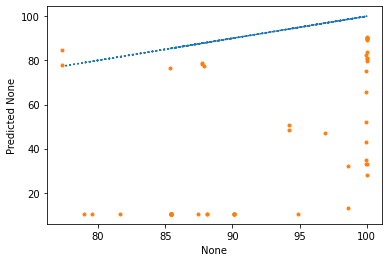

In [56]:
plt.plot(noneReal, noneReal, ":")
plt.plot(noneReal, noneHat, ".")
plt.xlabel('None')
plt.ylabel('Predicted None')
plt.show()

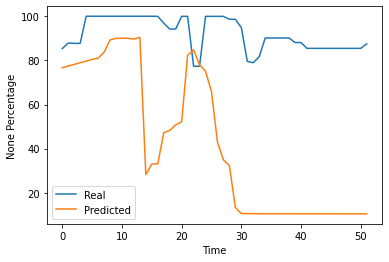

In [57]:
plt.plot(x, noneReal, label="Real")
plt.plot(x, noneHat, label="Predicted")
plt.xlabel('Time')
plt.ylabel('None Percentage')
plt.legend()
plt.show()